In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd

# Tree Equity Score

In [2]:
# Load census data from get census data step

In [4]:
census_data = pd.read_csv("DA_Calgary_census_data.csv")
census_data.columns

Index(['REF_AREA', 'Total_age_0_4', 'Visible_Minority_Total',
       'Visible_Minority', 'Unemployment_rate', 'Total_age_65_older',
       'Total_LIM_18_64', 'Total_LIM_65_over', 'LIM_18_64', 'LIM_65_over',
       'Language_Total', 'Language_NO_Eng_Fr', 'Total_age'],
      dtype='object')

## Calculate Priority Measures

In [5]:
census_data["age"]=(census_data["Total_age_0_4"]+census_data["Total_age_65_older"])/census_data["Total_age"]
census_data["visible_minority"]=census_data["Visible_Minority"]/census_data["Visible_Minority_Total"]
census_data["language"]=census_data["Language_NO_Eng_Fr"]/census_data["Language_Total"]
census_data["low_income"]=(census_data["LIM_18_64"]+census_data["LIM_65_over"])/(census_data["Total_LIM_18_64"]+census_data["Total_LIM_65_over"])
census_data["unemployed"]=census_data["Unemployment_rate"]/100


In [6]:
selected_columns=[
    "REF_AREA",
    "age",
    "visible_minority",
    "language",
    "low_income",
    "unemployed"
]

In [10]:
df = census_data[selected_columns]
df=df.dropna()
df.head()

,REF_AREA,age,visible_minority,language,low_income,unemployed
0,2021S051248060056,0.193548,0.552083,0.053763,0.051282,0.164
1,2021S051248060057,0.200000,0.397436,0.066667,0.076923,0.067
2,2021S051248060058,0.247312,0.536842,0.074468,0.088608,0.061
3,2021S051248060059,0.314286,0.454545,0.042857,0.049180,0.059
4,2021S051248060060,0.300813,0.543307,0.089431,0.066038,0.176


## Join Canopy Cover Data

In [11]:
canopy_data = gpd.read_file("canopy_2020_da.json").rename(columns={"frac":"2020"})
canopy_data.head()

,2020,DGUID,geometry
0,0.114208,2021S051248060056,"POLYGON ((-114.09955 51.13959, -114.09861 51.1..."
1,0.088751,2021S051248060057,"POLYGON ((-114.09217 51.14023, -114.09212 51.1..."
2,0.119542,2021S051248060058,"POLYGON ((-114.09900 51.13653, -114.09848 51.1..."
3,0.121823,2021S051248060059,"POLYGON ((-114.08938 51.14036, -114.08839 51.1..."
4,0.094170,2021S051248060060,"POLYGON ((-114.08898 51.14127, -114.08814 51.1..."


In [12]:
df= canopy_data.merge(df, left_on='DGUID', right_on='REF_AREA').drop(["REF_AREA"],axis=1)

In [17]:
df.head()

,2020,DGUID,geometry,age,visible_minority,language,low_income,unemployed,canopy_diff
0,0.114208,2021S051248060056,"POLYGON ((-114.09955 51.13959, -114.09861 51.1...",0.193548,0.552083,0.053763,0.051282,0.164,0.045792
1,0.088751,2021S051248060057,"POLYGON ((-114.09217 51.14023, -114.09212 51.1...",0.200000,0.397436,0.066667,0.076923,0.067,0.071249
2,0.119542,2021S051248060058,"POLYGON ((-114.09900 51.13653, -114.09848 51.1...",0.247312,0.536842,0.074468,0.088608,0.061,0.040458
3,0.121823,2021S051248060059,"POLYGON ((-114.08938 51.14036, -114.08839 51.1...",0.314286,0.454545,0.042857,0.049180,0.059,0.038177
4,0.094170,2021S051248060060,"POLYGON ((-114.08898 51.14127, -114.08814 51.1...",0.300813,0.543307,0.089431,0.066038,0.176,0.065830


## Difference between Canopy Goal (16%)

In [18]:
df["canopy_diff"] = (0.16-df["2020"]).clip(lower=0)

## Normalize Priority Indicators

In [19]:
priority_columns=[
    "age",
    "visible_minority",
    "language",
    "low_income",
    "unemployed"
]

priority_columns_norm=[
    "age_norm",
    "visible_minority_norm",
    "language_norm",
    "low_income_norm",
    "unemployed_norm"
]

In [20]:
scaler = MinMaxScaler()
df[priority_columns_norm] = scaler.fit_transform(df[priority_columns])

In [21]:
df.head()

,2020,DGUID,geometry,age,visible_minority,language,low_income,unemployed,canopy_diff,age_norm,visible_minority_norm,language_norm,low_income_norm,unemployed_norm
0,0.114208,2021S051248060056,"POLYGON ((-114.09955 51.13959, -114.09861 51.1...",0.193548,0.552083,0.053763,0.051282,0.164,0.045792,0.250499,0.555004,0.125154,0.073942,0.369369
1,0.088751,2021S051248060057,"POLYGON ((-114.09217 51.14023, -114.09212 51.1...",0.200000,0.397436,0.066667,0.076923,0.067,0.071249,0.260988,0.399539,0.155191,0.110912,0.150901
2,0.119542,2021S051248060058,"POLYGON ((-114.09900 51.13653, -114.09848 51.1...",0.247312,0.536842,0.074468,0.088608,0.061,0.040458,0.337909,0.539683,0.173352,0.127760,0.137387
3,0.121823,2021S051248060059,"POLYGON ((-114.08938 51.14036, -114.08839 51.1...",0.314286,0.454545,0.042857,0.049180,0.059,0.038177,0.446797,0.456950,0.099766,0.070911,0.132883
4,0.094170,2021S051248060060,"POLYGON ((-114.08898 51.14127, -114.08814 51.1...",0.300813,0.543307,0.089431,0.066038,0.176,0.065830,0.424892,0.546182,0.208183,0.095217,0.396396


## Calculate Tree Equity Score

In [22]:
def priority_index(x):
    return 0.1 + (1-.1)*((x["age_norm"]+x["visible_minority_norm"]+x["language_norm"]+x["low_income_norm"]+x["unemployed_norm"])/5)

In [23]:
df["priority"]=df.apply(priority_index, axis=1)

In [24]:
df["canopy_score"] = (df["canopy_diff"]/df["canopy_diff"].max())

In [25]:
def equity_index(x):
    return (1-(x["canopy_score"]*x["priority"]))*100

In [26]:
df["index"] = df.apply(equity_index, axis=1)

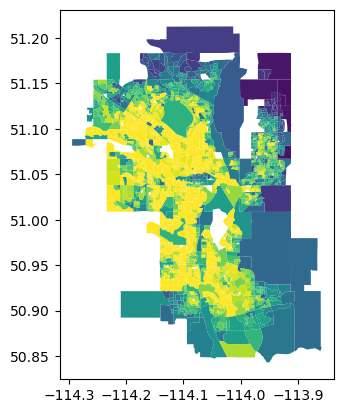

In [27]:
df.plot(column="index");

In [28]:
final_index = df[["geometry","DGUID","priority","index","2020"]+priority_columns]
final_index.head()

,geometry,DGUID,priority,index,2020,age,visible_minority,language,low_income,unemployed
0,"POLYGON ((-114.09955 51.13959, -114.09861 51.1...",2021S051248060056,0.347314,89.840238,0.114208,0.193548,0.552083,0.053763,0.051282,0.164
1,"POLYGON ((-114.09217 51.14023, -114.09212 51.1...",2021S051248060057,0.293956,86.620768,0.088751,0.200000,0.397436,0.066667,0.076923,0.067
2,"POLYGON ((-114.09900 51.13653, -114.09848 51.1...",2021S051248060058,0.336896,91.292925,0.119542,0.247312,0.536842,0.074468,0.088608,0.061
3,"POLYGON ((-114.08938 51.14036, -114.08839 51.1...",2021S051248060059,0.317315,92.261239,0.121823,0.314286,0.454545,0.042857,0.049180,0.059
4,"POLYGON ((-114.08898 51.14127, -114.08814 51.1...",2021S051248060060,0.400757,83.147023,0.094170,0.300813,0.543307,0.089431,0.066038,0.176


In [47]:
final_index.to_file("equity_index_da.geojson", driver="GeoJSON")  